# **1. Perkenalan Dataset**


# Pengenalan Dataset

## Deskripsi Umum
Dataset yang digunakan pada eksperimen ini adalah **Telco Customer Churn Dataset**. Dataset ini berisi informasi pelanggan sebuah perusahaan telekomunikasi, dengan tujuan utama untuk memprediksi apakah seorang pelanggan akan **berhenti berlangganan (churn)** atau **tetap berlangganan**.

Dataset ini banyak digunakan dalam studi kasus machine learning karena memiliki kombinasi fitur numerik dan kategorikal, serta merepresentasikan permasalahan klasifikasi yang umum ditemui di dunia industri.

## Sumber Dataset
Dataset diperoleh dari platform Kaggle dan dapat diakses melalui tautan berikut:  
https://www.kaggle.com/datasets/blastchar/telco-customer-churn

## Tujuan Eksperimen
Tujuan dari eksperimen ini adalah:
- Melakukan eksplorasi data pelanggan (EDA) untuk memahami karakteristik dan pola data
- Mengidentifikasi permasalahan data seperti missing value dan tipe data yang tidak sesuai
- Menentukan langkah-langkah preprocessing yang diperlukan agar dataset siap digunakan untuk pelatihan model machine learning
- Menyusun alur preprocessing yang nantinya dapat dikonversi menjadi proses otomatis

## Target Variabel
Target variabel pada dataset ini adalah kolom **`Churn`**, yang menunjukkan status pelanggan:
- `Yes` : pelanggan berhenti berlangganan
- `No` : pelanggan tetap berlangganan

Masalah ini termasuk ke dalam **binary classification problem**.

## Karakteristik Dataset
Secara umum, dataset ini memiliki karakteristik sebagai berikut:
- Berbentuk **tabular (CSV)**
- Terdiri dari fitur **numerik** dan **kategorikal**
- Memiliki informasi demografis pelanggan, layanan yang digunakan, serta informasi finansial
- Memiliki potensi **missing value** dan fitur yang memerlukan encoding sebelum digunakan dalam model

Dataset ini dinilai sesuai untuk eksperimen machine learning karena mencerminkan permasalahan nyata dan membutuhkan tahapan preprocessing yang komprehensif.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [2]:
# Import library utama
import pandas as pd
import numpy as np

# Visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from google.colab import drive
# Utility
import warnings
warnings.filterwarnings("ignore")

# Konfigurasi visualisasi
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [3]:
# import dari Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Memuat Dataset
data_path = "/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv"

# Membaca dataset
df = pd.read_csv(data_path)

# Menampilkan 5 baris pertama
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Menampilkan informasi dataset
df.info()

# Menampilkan ukuran dataset
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Missing Value per Kolom:


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


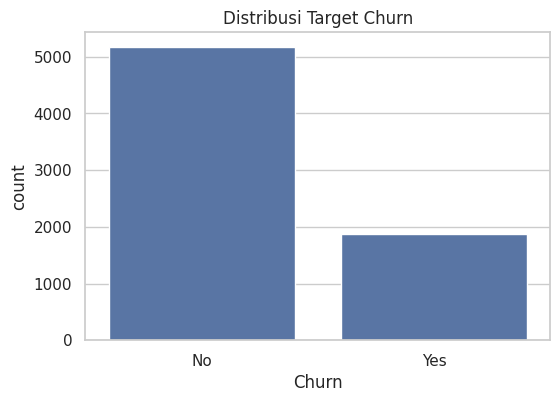


Persentase Target Churn:


,proportion
Churn,
No,73.463013
Yes,26.536987


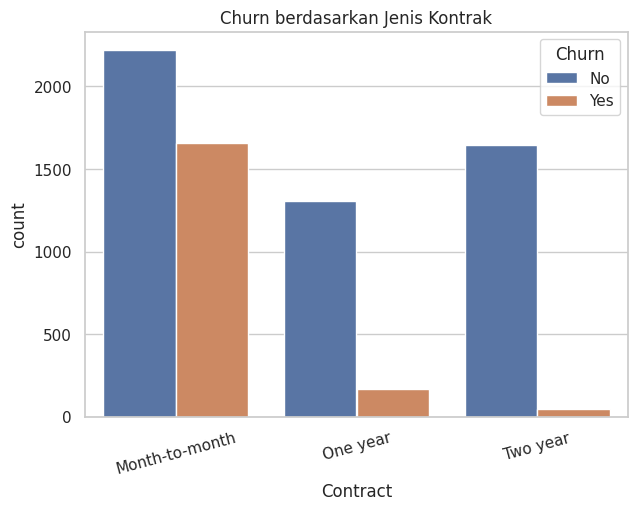

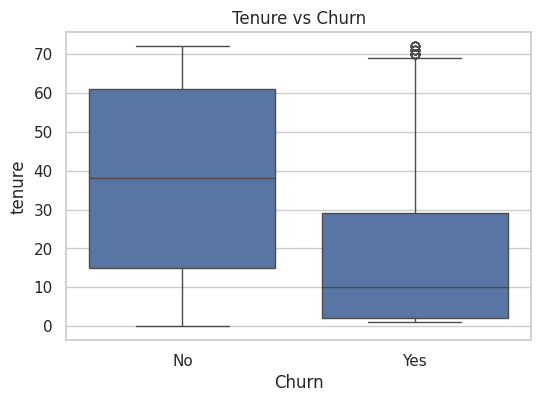

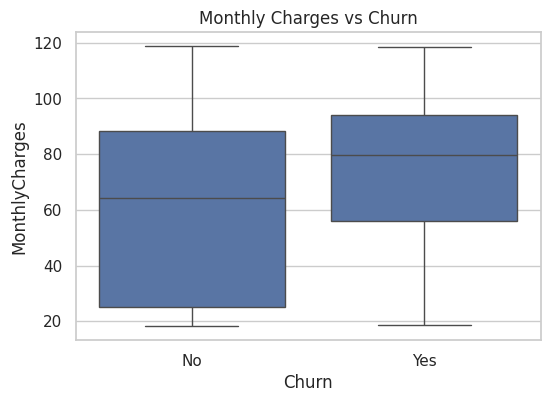

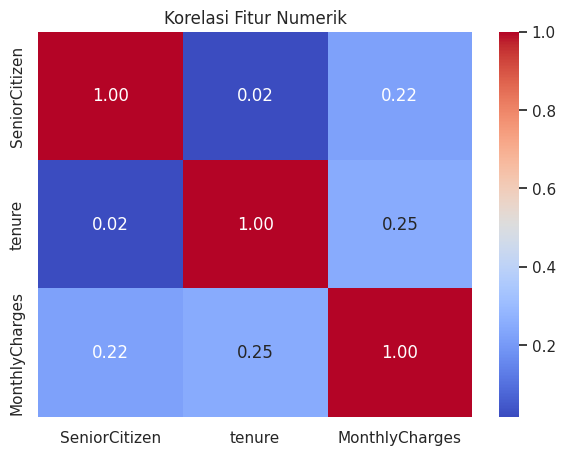

In [6]:
# Exploratory Data Analysis (EDA)

# 1. Cek missing value
print("Missing Value per Kolom:")
display(df.isnull().sum())

# 2. Distribusi target Churn
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Churn")
plt.title("Distribusi Target Churn")
plt.show()

print("\nPersentase Target Churn:")
display(df["Churn"].value_counts(normalize=True) * 100)

# 3. Churn berdasarkan jenis kontrak
plt.figure(figsize=(7,5))
sns.countplot(data=df, x="Contract", hue="Churn")
plt.title("Churn berdasarkan Jenis Kontrak")
plt.xticks(rotation=15)
plt.show()

# 4. Tenure vs Churn
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="Churn", y="tenure")
plt.title("Tenure vs Churn")
plt.show()

# 5. Monthly Charges vs Churn
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="Churn", y="MonthlyCharges")
plt.title("Monthly Charges vs Churn")
plt.show()

# 6. Korelasi fitur numerik
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(7,5))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi Fitur Numerik")
plt.show()


### Ringkasan Insight EDA

Berdasarkan hasil Exploratory Data Analysis (EDA) yang telah dilakukan, diperoleh beberapa insight penting sebagai berikut:

1. **Distribusi Target (Churn)**  
   Dataset menunjukkan ketidakseimbangan kelas yang ringan, di mana jumlah pelanggan yang **tidak churn (No)** lebih banyak dibandingkan pelanggan yang **churn (Yes)**. Kondisi ini masih tergolong wajar dan memungkinkan penggunaan metrik evaluasi seperti accuracy, precision, recall, dan F1-score pada tahap pemodelan.

2. **Pengaruh Jenis Kontrak terhadap Churn**  
   Pelanggan dengan jenis kontrak **month-to-month** memiliki tingkat churn yang jauh lebih tinggi dibandingkan pelanggan dengan kontrak **one year** atau **two year**. Hal ini menunjukkan bahwa durasi kontrak merupakan salah satu faktor yang sangat berpengaruh terhadap kemungkinan pelanggan untuk berhenti berlangganan.

3. **Hubungan Tenure dengan Churn**  
   Pelanggan yang melakukan churn umumnya memiliki **masa berlangganan (tenure) yang lebih rendah**. Sebaliknya, pelanggan dengan tenure yang lebih panjang cenderung tetap bertahan. Insight ini menunjukkan bahwa semakin lama pelanggan berlangganan, semakin kecil kemungkinan mereka untuk churn.

4. **Monthly Charges dan Churn**  
   Pelanggan yang churn cenderung memiliki **nilai MonthlyCharges yang lebih tinggi** dibandingkan pelanggan yang tidak churn. Hal ini mengindikasikan bahwa faktor biaya berlangganan dapat memengaruhi keputusan pelanggan untuk berhenti menggunakan layanan.

5. **Korelasi Fitur Numerik**  
   Analisis korelasi menunjukkan bahwa fitur numerik seperti `tenure` dan `MonthlyCharges` memiliki korelasi positif, meskipun tidak terlalu kuat. Selain itu, tidak ditemukan korelasi yang sangat tinggi antar fitur numerik, sehingga risiko multikolinearitas masih dapat ditangani pada tahap preprocessing dan pemodelan.

6. **Implikasi terhadap Preprocessing**  
   Dari hasil EDA, dapat disimpulkan bahwa dataset memerlukan beberapa tahapan preprocessing, seperti penanganan tipe data yang tidak sesuai, encoding fitur kategorikal, serta scaling fitur numerik agar data siap digunakan dalam pelatihan model machine learning.


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [8]:
# Data Preprocessing

df_clean = df.copy()

# 1. Menghapus kolom customerID (tidak informatif)
df_clean.drop(columns=["customerID"], inplace=True)

# 2. Menangani missing value & tipe data pada TotalCharges
# Ubah TotalCharges ke numerik
df_clean["TotalCharges"] = pd.to_numeric(df_clean["TotalCharges"], errors="coerce")

# Cek jumlah missing setelah konversi
print("Missing value TotalCharges:", df_clean["TotalCharges"].isnull().sum())

# Isi missing value dengan median
df_clean["TotalCharges"].fillna(df_clean["TotalCharges"].median(), inplace=True)

# 3. Menghapus data duplikat (jika ada)
before = df_clean.shape[0]
df_clean.drop_duplicates(inplace=True)
after = df_clean.shape[0]
print(f"Duplikat dihapus: {before - after}")

# 4. Encoding target variable (Churn)
df_clean["Churn"] = df_clean["Churn"].map({"Yes": 1, "No": 0})

# 5. Memisahkan fitur dan target
X = df_clean.drop(columns=["Churn"])
y = df_clean["Churn"]

# 6. Identifikasi kolom numerik & kategorikal
num_cols = X.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X.select_dtypes(include=["object"]).columns

print("Kolom numerik:", list(num_cols))
print("Kolom kategorikal:", list(cat_cols))

# 7. Preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ]
)

# 8. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 9. Fit & transform data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("Shape X_train:", X_train_processed.shape)
print("Shape X_test:", X_test_processed.shape)


Missing value TotalCharges: 11
Duplikat dihapus: 22
Kolom numerik: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Kolom kategorikal: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Shape X_train: (5616, 45)
Shape X_test: (1405, 45)


### Ringkasan Preprocessing

Tahapan preprocessing dilakukan berdasarkan hasil EDA sebelumnya. Kolom yang tidak relevan seperti `customerID` dihapus karena tidak memiliki nilai prediktif. Kolom `TotalCharges` dikonversi ke tipe numerik dan missing value ditangani menggunakan nilai median.

Fitur kategorikal di-encode menggunakan One-Hot Encoding, sedangkan fitur numerik distandarisasi menggunakan StandardScaler. Data kemudian dibagi menjadi data latih dan data uji dengan proporsi 80:20. Hasil preprocessing ini menghasilkan dataset yang siap digunakan pada tahap pemodelan machine learning.


In [9]:
# Menyimpan Dataset Hasil Preprocessing

import os

# Buat folder output
output_dir = "../preprocessing/namadataset_preprocessing"
os.makedirs(output_dir, exist_ok=True)

# Simpan data hasil preprocessing
pd.DataFrame(X_train_processed).to_csv(
    os.path.join(output_dir, "X_train.csv"), index=False
)
pd.DataFrame(X_test_processed).to_csv(
    os.path.join(output_dir, "X_test.csv"), index=False
)
pd.DataFrame(y_train).to_csv(
    os.path.join(output_dir, "y_train.csv"), index=False
)
pd.DataFrame(y_test).to_csv(
    os.path.join(output_dir, "y_test.csv"), index=False
)

print("Dataset hasil preprocessing berhasil disimpan.")


Dataset hasil preprocessing berhasil disimpan.
